![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/nlu/blob/master/examples/colab/Training/binary_text_classification/NLU_training_sentiment_classifier_demo_finanical_news.ipynb)



# Training a Sentiment Analysis Classifier with NLU 
## 2 class Finance News sentiment classifier training
With the [SentimentDL model](https://nlp.johnsnowlabs.com/docs/en/annotators#sentimentdl-multi-class-sentiment-analysis-annotator) from Spark NLP you can achieve State Of the Art results on any multi class text classification problem 

This notebook showcases the following features : 

- How to train the deep learning classifier
- How to store a pipeline to disk
- How to load the pipeline from disk (Enables NLU offline mode)

You can achieve these results or even better on this dataset with training data:

<br>

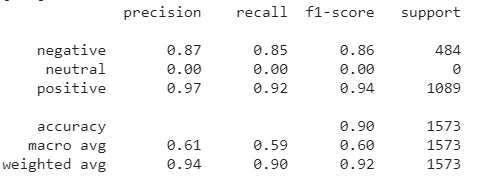




You can achieve these results or even better on this dataset with test data:


<br>


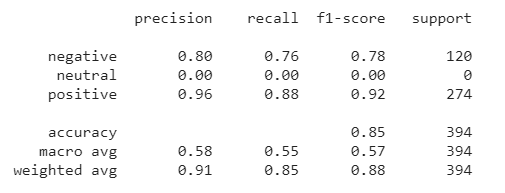

# 1. Install Java 8 and NLU

In [ ]:
import os
from sklearn.metrics import classification_report
! apt-get update -qq > /dev/null   
# Install java
! apt-get install -y openjdk-8-jdk-headless -qq > /dev/null
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["PATH"] = os.environ["JAVA_HOME"] + "/bin:" + os.environ["PATH"]
! pip install nlu pyspark==2.4.7 > /dev/null  

import nlu

# 2. Download Finanical News  Sentiment dataset 
https://www.kaggle.com/ankurzing/sentiment-analysis-for-financial-news

This dataset contains the sentiments for financial news headlines from the perspective of a retail investor. Further details about the dataset can be found in: Malo, P., Sinha, A., Takala, P., Korhonen, P. and Wallenius, J. (2014): “Good debt or bad debt: Detecting semantic orientations in economic texts.” Journal of the American Society for Information Science and Technology.

In [ ]:
! wget http://ckl-it.de/wp-content/uploads/2021/01/all-data.csv


--2021-03-01 01:39:50--  http://ckl-it.de/wp-content/uploads/2021/01/all-data.csv
Resolving ckl-it.de (ckl-it.de)... 217.160.0.108, 2001:8d8:100f:f000::209
Connecting to ckl-it.de (ckl-it.de)|217.160.0.108|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 704799 (688K) [text/csv]
Saving to: ‘all-data.csv’

all-data.csv        100%[===================>] 688.28K  --.-KB/s    in 0.1s    

2021-03-01 01:39:50 (5.78 MB/s) - ‘all-data.csv’ saved [704799/704799]



In [ ]:
import pandas as pd
train_path = '/content/all-data.csv'

train_df = pd.read_csv(train_path)
# the text data to use for classification should be in a column named 'text'
# the label column must have name 'y' name be of type str
columns=['text','y']
train_df = train_df[columns]
train_df = train_df[~train_df["y"].isin(["neutral"])]
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(train_df, test_size=0.2)
train_df

,text,y
4719,The fair value of the company 's investment pr...,negative
373,"The company 's scheduled traffic , measured in...",positive
841,"Forestries were also higher , driven by yester...",positive
2072,"H+_kan Dahlstr+¦m , head of mobility services ...",positive
712,Both loans will be used to finance strategic i...,positive
...,...,...
4395,EMSA Deputy Chairman of the Board Juri Lember ...,negative
4810,"Thanks to the internet , consumers compare pro...",negative
3491,7 March 2011 - Finnish IT company Digia Oyj HE...,positive
51,"Within the framework of the partnership , Noki...",positive


# 3. Train Deep Learning Classifier using nlu.load('train.sentiment')

You dataset label column should be named 'y' and the feature column with text data should be named 'text'

In [ ]:
import nlu 
# load a trainable pipeline by specifying the train. prefix  and fit it on a datset with label and text columns
# by default the Universal Sentence Encoder (USE) Sentence embeddings are used for generation
trainable_pipe = nlu.load('train.sentiment')
fitted_pipe = trainable_pipe.fit(train_df.iloc[:50])

# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df.iloc[:50],output_level='document')
#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['sentiment']))

preds

tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00        14
    positive       0.72      1.00      0.84        36

    accuracy                           0.72        50
   macro avg       0.36      0.50      0.42        50
weighted avg       0.52      0.72      0.60        50



,y,text,document,sentiment,default_name_embeddings,sentiment_confidence
origin_index,,,,,,
4719,negative,The fair value of the company 's investment pr...,The fair value of the company 's investment pr...,positive,"[0.036923788487911224, 0.06703860312700272, -0...",0.985028
373,positive,"The company 's scheduled traffic , measured in...","The company 's scheduled traffic , measured in...",positive,"[-0.02716548554599285, 0.041895847767591476, -...",0.989986
841,positive,"Forestries were also higher , driven by yester...","Forestries were also higher , driven by yester...",positive,"[0.07610785216093063, -0.017332645133137703, -...",0.990836
2072,positive,"H+_kan Dahlstr+¦m , head of mobility services ...","H+_kan Dahlstr+¦m , head of mobility services ...",positive,"[0.059579234570264816, 0.01714557223021984, -0...",0.987673
712,positive,Both loans will be used to finance strategic i...,Both loans will be used to finance strategic i...,positive,"[0.06402906030416489, 0.037328142672777176, -0...",0.980973
1722,positive,HELSINKI (Thomson Financial)- Kemira GrowHow s...,HELSINKI (Thomson Financial)- Kemira GrowHow s...,positive,"[0.07542752474546432, 0.03456662967801094, -0....",0.988675
793,positive,` This is a repeat order to follow successfull...,` This is a repeat order to follow successfull...,positive,"[0.016312969848513603, 0.03869722783565521, -0...",0.980360
1483,positive,`` We have significant experience in smartphon...,`` We have significant experience in smartphon...,positive,"[0.056398119777441025, -0.010660165920853615, ...",0.980428
807,positive,Finnish Metso Paper has won an order to supply...,Finnish Metso Paper has won an order to supply...,positive,"[0.03834717348217964, 0.05267363414168358, 0.0...",0.977349


# 4. Test the fitted pipe on new example

In [ ]:
fitted_pipe.predict('According to the most recent update there has been a major decrese in the rate of oil')

,document,sentiment,default_name_embeddings,sentiment_confidence
origin_index,,,,
0,According to the most recent update there has ...,positive,"[0.00991145521402359, 0.041628580540418625, -0...",0.968396


## 5. Configure pipe training parameters

In [ ]:
trainable_pipe.print_info()

The following parameters are configurable for this NLU pipeline (You can copy paste the examples) :
>>> pipe['sentiment_dl'] has settable params:
pipe['sentiment_dl'].setMaxEpochs(2)                 | Info: Maximum number of epochs to train | Currently set to : 2
pipe['sentiment_dl'].setLr(0.005)                    | Info: Learning Rate | Currently set to : 0.005
pipe['sentiment_dl'].setBatchSize(64)                | Info: Batch size | Currently set to : 64
pipe['sentiment_dl'].setDropout(0.5)                 | Info: Dropout coefficient | Currently set to : 0.5
pipe['sentiment_dl'].setEnableOutputLogs(True)       | Info: Whether to use stdout in addition to Spark logs. | Currently set to : True
pipe['sentiment_dl'].setThreshold(0.6)               | Info: The minimum threshold for the final result otheriwse it will be neutral | Currently set to : 0.6
pipe['sentiment_dl'].setThresholdLabel('neutral')    | Info: In case the score is less than threshold, what should be the label. Default i

## 6. Retrain with new parameters

In [ ]:
# Train longer!
trainable_pipe['sentiment_dl'].setMaxEpochs(5)  
fitted_pipe = trainable_pipe.fit(train_df.iloc[:100])
# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df.iloc[:100],output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['sentiment']))

preds

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00        30
     neutral       0.00      0.00      0.00         0
    positive       0.74      1.00      0.85        70

    accuracy                           0.70       100
   macro avg       0.25      0.33      0.28       100
weighted avg       0.52      0.70      0.60       100



,y,text,document,sentiment,default_name_embeddings,sentiment_confidence
origin_index,,,,,,
4719,negative,The fair value of the company 's investment pr...,The fair value of the company 's investment pr...,positive,"[0.036923788487911224, 0.06703860312700272, -0...",0.790602
373,positive,"The company 's scheduled traffic , measured in...","The company 's scheduled traffic , measured in...",positive,"[-0.02716548554599285, 0.041895847767591476, -...",0.968895
841,positive,"Forestries were also higher , driven by yester...","Forestries were also higher , driven by yester...",positive,"[0.07610785216093063, -0.017332645133137703, -...",0.954134
2072,positive,"H+_kan Dahlstr+¦m , head of mobility services ...","H+_kan Dahlstr+¦m , head of mobility services ...",positive,"[0.059579234570264816, 0.01714557223021984, -0...",0.978695
712,positive,Both loans will be used to finance strategic i...,Both loans will be used to finance strategic i...,positive,"[0.06402906030416489, 0.037328142672777176, -0...",0.732152
...,...,...,...,...,...,...
542,negative,Pharmaceuticals group Orion Corp reported a fa...,Pharmaceuticals group Orion Corp reported a fa...,positive,"[0.037232112139463425, 0.0271251630038023, -0....",0.782454
2061,positive,` Very recommendable ' is the Nokian Z G2 acco...,` Very recommendable ' is the Nokian Z G2 acco...,positive,"[0.014071580022573471, 0.0036627694498747587, ...",0.979991
565,positive,The growth of net sales has continued favourab...,The growth of net sales has continued favourab...,positive,"[0.05051519721746445, 0.05987134203314781, -0....",0.953826


#7.  Try training with different Embeddings

In [ ]:
# We can use nlu.print_components(action='embed_sentence') to see every possibler sentence embedding we could use. Lets use bert!
nlu.print_components(action='embed_sentence')

For language <en> NLU provides the following Models : 
nlu.load('en.embed_sentence') returns Spark NLP model tfhub_use
nlu.load('en.embed_sentence.use') returns Spark NLP model tfhub_use
nlu.load('en.embed_sentence.tfhub_use') returns Spark NLP model tfhub_use
nlu.load('en.embed_sentence.use.lg') returns Spark NLP model tfhub_use_lg
nlu.load('en.embed_sentence.tfhub_use.lg') returns Spark NLP model tfhub_use_lg
nlu.load('en.embed_sentence.albert') returns Spark NLP model albert_base_uncased
nlu.load('en.embed_sentence.electra') returns Spark NLP model sent_electra_small_uncased
nlu.load('en.embed_sentence.electra_small_uncased') returns Spark NLP model sent_electra_small_uncased
nlu.load('en.embed_sentence.electra_base_uncased') returns Spark NLP model sent_electra_base_uncased
nlu.load('en.embed_sentence.electra_large_uncased') returns Spark NLP model sent_electra_large_uncased
nlu.load('en.embed_sentence.bert') returns Spark NLP model sent_bert_base_uncased
nlu.load('en.embed_sentenc

In [ ]:
trainable_pipe = nlu.load('en.embed_sentence.small_bert_L12_768 train.sentiment')
# We need to train longer and user smaller LR for NON-USE based sentence embeddings usually
# We could tune the hyperparameters further with hyperparameter tuning methods like gridsearch
# Also longer training gives more accuracy
trainable_pipe['sentiment_dl'].setMaxEpochs(70)  
trainable_pipe['sentiment_dl'].setLr(0.0005) 
fitted_pipe = trainable_pipe.fit(train_df)
# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df,output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['sentiment']))

#preds

sent_small_bert_L12_768 download started this may take some time.
Approximate size to download 392.9 MB
[OK!]
              precision    recall  f1-score   support

    negative       0.87      0.85      0.86       484
     neutral       0.00      0.00      0.00         0
    positive       0.97      0.92      0.94      1089

    accuracy                           0.90      1573
   macro avg       0.61      0.59      0.60      1573
weighted avg       0.94      0.90      0.92      1573



# 7.1 evaluate on Test Data

In [ ]:
preds = fitted_pipe.predict(test_df,output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['sentiment']))

              precision    recall  f1-score   support

    negative       0.80      0.76      0.78       120
     neutral       0.00      0.00      0.00         0
    positive       0.96      0.88      0.92       274

    accuracy                           0.85       394
   macro avg       0.58      0.55      0.57       394
weighted avg       0.91      0.85      0.88       394



# 8. Lets save the model

In [ ]:
stored_model_path = './models/classifier_dl_trained' 
fitted_pipe.save(stored_model_path)

Stored model in ./models/classifier_dl_trained


# 9. Lets load the model from HDD.
This makes Offlien NLU usage possible!   
You need to call nlu.load(path=path_to_the_pipe) to load a model/pipeline from disk.

In [ ]:
hdd_pipe = nlu.load(path=stored_model_path)

preds = hdd_pipe.predict('According to the most recent update there has been a major decrese in the rate of oil')
preds

Fitting on empty Dataframe, could not infer correct training method!


,document,sentiment,sentiment_confidence,en_embed_sentence_small_bert_L12_768_embeddings
origin_index,,,,
0,Tesla plans to invest 10M into the ML sector,positive,0.999980,"[0.15737222135066986, 0.2598555386066437, 0.85..."


In [ ]:
hdd_pipe.print_info()

The following parameters are configurable for this NLU pipeline (You can copy paste the examples) :
>>> pipe['document_assembler'] has settable params:
pipe['document_assembler'].setCleanupMode('shrink')            | Info: possible values: disabled, inplace, inplace_full, shrink, shrink_full, each, each_full, delete_full | Currently set to : shrink
>>> pipe['sentence_detector'] has settable params:
pipe['sentence_detector'].setCustomBounds([])                  | Info: characters used to explicitly mark sentence bounds | Currently set to : []
pipe['sentence_detector'].setDetectLists(True)                 | Info: whether detect lists during sentence detection | Currently set to : True
pipe['sentence_detector'].setExplodeSentences(False)           | Info: whether to explode each sentence into a different row, for better parallelization. Defaults to false. | Currently set to : False
pipe['sentence_detector'].setMaxLength(99999)                  | Info: Set the maximum allowed length for ea